In [1]:
# import libraries 
import requests as req
import pandas as pd
import datetime as dt
import time
import matplotlib.pyplot as plt
from matplotlib import *
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
from splinter import Browser
import csv
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [2]:
#Scrapping the table data form Website and save it into CSV
data = []

# browser = Browser('firefox')
with Browser() as browser:
    # Visit URL
    url = "https://www.runraceresults.com/Secure/RaceResults.cfm?ID=RCLF2017"
    browser.visit(url)
    time.sleep(10)
    
    #assigning variable to replace the string in the x
    a = 1
    x = f"javascript:getOneClick('RCLF2017','1','{a}','overall')"
    
    #find the variable x from above by using href html tag and clicking on it
    button = browser.find_link_by_partial_href(x)
    button.click()
    time.sleep(5)
    html = browser.html
    time.sleep(5)
    soup = BeautifulSoup(html, "html.parser")
    
    #finding all the 'tbody' in the html link
    table_body=soup.find_all('tbody')
    
    #picking the 2nd 'tbody' and assigning variable
    table_1 = table_body[1]
    rows = table_1.find_all('tr')
    
    #iterrow and next(iterow) allow us to skip the first loop and run the following loop
    iterrow = iter(rows)
    next(iterrow)
    
    #loop through all the table row and pull out the table data (x.text.strip()) allow you to remove all the html tags.
    for row in iterrow:
        cols=row.find_all('td')
        cols=[x.text.strip() for x in cols]
#         print(cols)
        data.append(cols)
    

    #running the same code for multiple pages (starting from page 2)
    for i in range(1, 66):
        q = (i*100) + 1
        x = f"javascript:getOneClick('RCLF2017','1','{q}','overall')"
        button = browser.find_link_by_partial_href(x)
        button.click()
        time.sleep(5)
        html = browser.html
        time.sleep(5)
        soup = BeautifulSoup(html, "html.parser")
        table_body=soup.find_all('tbody')
        table_1 = table_body[1]
        rows = table_1.find_all('tr')
        iterrow = iter(rows)
        next(iterrow)
        for row in iterrow:
            cols=row.find_all('td')
            cols=[x.text.strip() for x in cols]
            data.append(cols)
    
    
    
    
df = pd.DataFrame(
    np.array(data))

df.columns = ["Place", "Name", "Location","Bib","Net_time", "Pace", "Division/Place", "Sex-Age", "Sex-Place", "Gun Time", "Age_grade"]
df


,Place,Name,Location,Bib,Net_time,Pace,Division/Place,Sex-Age,Sex-Place,Gun Time,Age_grade
0,1,Jorge Maravilla,"Mill Valley, CA",3,2:28:23,5:40,M 35-39/0,M-39,1,2:28:23,84.71%
1,2,Semereab Gebrekidan,"Oakland, CA",81,2:31:07,5:46,M 30-34/0,M-32,2,2:31:07,81.37%
2,3,Ben Demaree,"Berkeley, CA",61,2:32:10,5:49,M 25-29/0,M-25,3,2:32:10,80.81%
3,4,Andrew Monaghan,"Fort Collins, CO",33,2:33:37,5:52,M 20-24/1,M-23,4,2:33:37,80.05%
4,5,Chris Jordan,"GB,",100,2:34:04,5:53,M 35-39/1,M-37,5,2:34:04,80.76%
5,6,Anthony Kunkel,"Durango, CO",29,2:34:05,5:53,M 25-29/1,M-25,6,2:34:06,79.80%
6,7,Matt Duffy,"Oakland, CA",25,2:37:02,6:00,M 25-29/2,M-27,7,2:37:02,78.30%
7,8,Nathan Krah,"Salt Lake City, UT",11,2:38:49,6:04,M 30-34/1,M-31,8,2:38:50,77.42%
8,9,Abinazer Aghegnehu,"Los, CA",83,2:39:35,6:06,M 30-34/2,M-31,9,2:39:35,77.05%
9,10,Matthew Deyo,"Cambridge, MA",23,2:45:08,6:18,M 20-24/2,M-23,10,2:45:08,74.46%


In [3]:
df.to_csv("SFmarathon2017origin.csv", index=False)

In [5]:
#Using CSV from above as dataframe
import pandas as pd
import numpy as np

marathon = "SFmarathon2017origin.csv"

#reading csv
marathon_pd = pd.read_csv(marathon, encoding = 'latin-1')
marathon_pd.head()

,Place,Name,Location,Bib,Net_time,Pace,Division/Place,Sex-Age,Sex-Place,Gun Time,Age_grade
0,1,Jorge Maravilla,"Mill Valley, CA",3,2:28:23,5:40,M 35-39/0,M-39,1,2:28:23,84.71%
1,2,Semereab Gebrekidan,"Oakland, CA",81,2:31:07,5:46,M 30-34/0,M-32,2,2:31:07,81.37%
2,3,Ben Demaree,"Berkeley, CA",61,2:32:10,5:49,M 25-29/0,M-25,3,2:32:10,80.81%
3,4,Andrew Monaghan,"Fort Collins, CO",33,2:33:37,5:52,M 20-24/1,M-23,4,2:33:37,80.05%
4,5,Chris Jordan,"GB,",100,2:34:04,5:53,M 35-39/1,M-37,5,2:34:04,80.76%


In [6]:
#Split Sex-Age into 2 column and delete the original Sex-Age column
marathon_pd["Sex"], marathon_pd["Age"] = marathon_pd["Sex-Age"].str.split('-').str
del marathon_pd["Sex-Age"] 

In [19]:
#checking what we did from above
marathon_pd.head()

,Place,Name,Location,Bib,Net_time,Pace,Division/Place,Sex-Place,Gun Time,Age_grade,Sex,Age
0,1,Jorge Maravilla,"Mill Valley, CA",3,2:28:23,5:40,M 35-39/0,1,2:28:23,84.71%,M,39
1,2,Semereab Gebrekidan,"Oakland, CA",81,2:31:07,5:46,M 30-34/0,2,2:31:07,81.37%,M,32
2,3,Ben Demaree,"Berkeley, CA",61,2:32:10,5:49,M 25-29/0,3,2:32:10,80.81%,M,25
3,4,Andrew Monaghan,"Fort Collins, CO",33,2:33:37,5:52,M 20-24/1,4,2:33:37,80.05%,M,23
4,5,Chris Jordan,"GB,",100,2:34:04,5:53,M 35-39/1,5,2:34:04,80.76%,M,37


In [7]:
import pandas as pd
import datetime as dt

#Setting Net_time and Pace as datetime.time object
marathon_pd['Net_time'] = pd.to_datetime(marathon_pd['Net_time'],format= '%H:%M:%S').dt.time
marathon_pd['Pace'] = pd.to_datetime(marathon_pd['Pace'],format= '%M:%S').dt.time

In [8]:
#exporting the csv to be use on merged Strava vs SFmarathon notebook
marathon_pd.to_csv("SFmarathon2017split.csv")

In [12]:
#Selecting Male Only and female Only to compare to Net_time
male_runner = marathon_pd.loc[marathon_pd["Sex"] == "M", "Net_time"]
male_age = marathon_pd.loc[marathon_pd["Sex"] == "M", "Age"]

female_runner = marathon_pd.loc[marathon_pd["Sex"] == "F", "Net_time"]
female_age = marathon_pd.loc[marathon_pd["Sex"] == "F", "Age"]

In [14]:
#Creating a list that convert the above data to integer
#male only age vs Finish time
ym = []
for i in male_runner:
    ym.append(i)
am = []
for i in male_age:
    am.append(int(i))

#female only age vs Finish time
yf = []
for i in female_runner:
    yf.append(i)
af = []
for i in female_age:
    af.append(int(i))

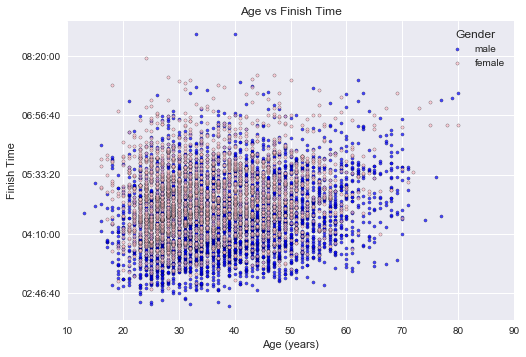

In [15]:
#Finish Time vs Sex and Age

y_axis = ym
x_axis = am

y_axis1 = yf
x_axis1 = af

m_age_finish = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s= 10, alpha=0.70)


f_age_finish = plt.scatter(x_axis1, y_axis1, marker="o", facecolors="pink", edgecolors="black",
            s= 10, alpha=0.70)

lgnd = plt.legend((m_age_finish,f_age_finish),('male','female'), fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="Gender", 
                  labelspacing=0.5)

plt.xlim(10,90)

plt.xlabel('Age (years)')
plt.ylabel('Finish Time')
plt.title('Age vs Finish Time')
plt.show()

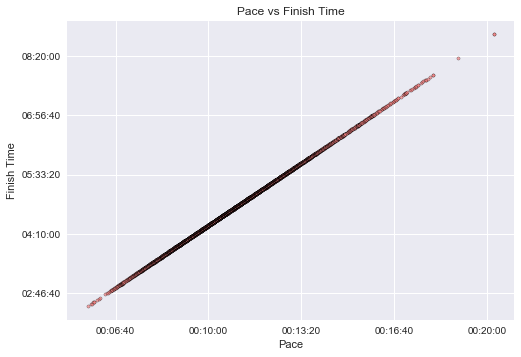

In [16]:
#Finish time vs Pace
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt


x = []
for i in marathon_pd['Pace']:
    x.append(i)

y = []
for i in marathon_pd['Net_time']:
    y.append(i)


PaceVsFinish = plt.scatter(x, y, marker="o", facecolors="lightcoral", edgecolors="black",s= 10, alpha=0.70)
plt.xlabel('Pace')
plt.ylabel('Finish Time')
plt.title('Pace vs Finish Time')
plt.show()


In [17]:
#Create new column Finish_Sec to store data of finish time converted in seconds
marathon_pd["Finish_Sec"] = ""
marathon_pd.head()


# marathon_pd.set_index('Net_time', inplace=True)
# marathon_pd
pseconds = lambda hms:sum(map(lambda a,b: int(a)*b,hms.split(':'),(3600,60,1)))
pseconds("10:30:00")

37800

In [18]:
Finish_Sec =[]
for x in marathon_pd['Net_time']:
    Finish_Sec.append( pseconds(str(x)))
len(marathon_pd['Net_time'])

6585

In [19]:
marathon_pd["Finish_Sec"] = Finish_Sec

In [20]:
marathon_pd.head()

,Place,Name,Location,Bib,Net_time,Pace,Division/Place,Sex-Place,Gun Time,Age_grade,Sex,Age,Finish_Sec
0,1,Jorge Maravilla,"Mill Valley, CA",3,02:28:23,00:05:40,M 35-39/0,1,2:28:23,84.71%,M,39,8903
1,2,Semereab Gebrekidan,"Oakland, CA",81,02:31:07,00:05:46,M 30-34/0,2,2:31:07,81.37%,M,32,9067
2,3,Ben Demaree,"Berkeley, CA",61,02:32:10,00:05:49,M 25-29/0,3,2:32:10,80.81%,M,25,9130
3,4,Andrew Monaghan,"Fort Collins, CO",33,02:33:37,00:05:52,M 20-24/1,4,2:33:37,80.05%,M,23,9217
4,5,Chris Jordan,"GB,",100,02:34:04,00:05:53,M 35-39/1,5,2:34:04,80.76%,M,37,9244


In [21]:
#create an array of time using range function to represent time from 2:30 through 10:30 in seconds. 
time_range = list(range(9000,37800, 60))
time_range
len(time_range)

480

In [22]:
run_countSF = marathon_pd.groupby(pd.cut(marathon_pd.Finish_Sec, time_range)).count()
run_countSF.head()

,Place,Name,Location,Bib,Net_time,Pace,Division/Place,Sex-Place,Gun Time,Age_grade,Sex,Age,Finish_Sec
Finish_Sec,,,,,,,,,,,,,
"(9000, 9060]",0,0,0,0,0,0,0,0,0,0,0,0,0
"(9060, 9120]",1,1,1,1,1,1,1,1,1,1,1,1,1
"(9120, 9180]",1,1,1,1,1,1,1,1,1,1,1,1,1
"(9180, 9240]",1,1,1,1,1,1,1,1,1,1,1,1,1
"(9240, 9300]",2,2,2,2,2,2,2,2,2,2,2,2,2


In [24]:
#Converting the data to datetime.time value
from datetime import datetime
x_plot=list(range(9060,37800, 60))
x_ticks = []
for x in x_plot:
    x_ticks.append(str(time.strftime("%H:%M:%S", time.gmtime(x))))
    
x = []
for i in x_ticks:
    x.append(datetime.strptime(i,'%H:%M:%S').time())

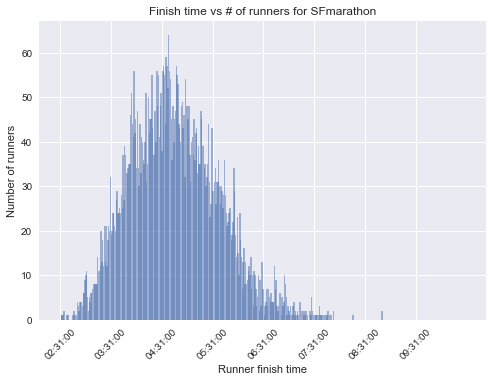

In [26]:
bar_width = 100
plt.bar(x,run_countSF["Name"],bar_width, align='center', alpha=0.5)

plt.xlabel('Runner finish time')
plt.ylabel('Number of runners')

plt.xticks(x, rotation=45)
plt.title('Finish time vs # of runners for SFmarathon')

#you can change the nbins to whatever number and it will change the ticks
plt.locator_params(nbins=8, axis ='x')
plt.show( )

In [27]:
run_countSF.to_csv("runcount_SF2017.csv")
marathon_pd.to_csv("sec_SF2017.csv")